In [2]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_ica1 = pd.read_csv("ICA29.csv")
df_ica1.head()

,Region,Year,Statistic Label,UNIT,VALUE
0,State,2007,Households with Computer,%,65.0
1,State,2007,Households with Computer Unweighted Sample,Number,4361.0
2,State,2007,Households with Computer connected to the Inte...,%,57.0
3,State,2007,Households with Computer connected to the Inte...,Number,4361.0
4,State,2008,Households with Computer,%,70.0


In [5]:
df_ica1.shape

(360, 5)

In [6]:
df_ica1.Year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [7]:
df_ica2 = pd.read_csv("ICA172.csv")
df_ica2.head()

,STATISTIC Label,Year,NUTS 3 Region,UNIT,VALUE
0,Households with internet access,2022,State,%,94
1,Households with internet access,2022,Border,%,90
2,Households with internet access,2022,Midland,%,93
3,Households with internet access,2022,West,%,91
4,Households with internet access,2022,Dublin,%,97


In [8]:
df_ica2.shape

(27, 5)

In [9]:
df_ica2.Year.unique()

array([2022, 2021, 2020], dtype=int64)

In [10]:
#re-order columns 
df_ica1 = df_ica1[['Statistic Label','Year','Region','UNIT','VALUE']]
df_ica1.head()

,Statistic Label,Year,Region,UNIT,VALUE
0,Households with Computer,2007,State,%,65.0
1,Households with Computer Unweighted Sample,2007,State,Number,4361.0
2,Households with Computer connected to the Inte...,2007,State,%,57.0
3,Households with Computer connected to the Inte...,2007,State,Number,4361.0
4,Households with Computer,2008,State,%,70.0


In [11]:
df_ica1.head()

,Statistic Label,Year,Region,UNIT,VALUE
0,Households with Computer,2007,State,%,65.0
1,Households with Computer Unweighted Sample,2007,State,Number,4361.0
2,Households with Computer connected to the Inte...,2007,State,%,57.0
3,Households with Computer connected to the Inte...,2007,State,Number,4361.0
4,Households with Computer,2008,State,%,70.0


In [12]:
df_ica1 = df_ica1.drop(df_ica1[(df_ica1["Statistic Label"] != "Households with Computer connected to the Internet")].index)


In [13]:
df_ica1.shape

(90, 5)

In [14]:
df_ica2.head()

,STATISTIC Label,Year,NUTS 3 Region,UNIT,VALUE
0,Households with internet access,2022,State,%,94
1,Households with internet access,2022,Border,%,90
2,Households with internet access,2022,Midland,%,93
3,Households with internet access,2022,West,%,91
4,Households with internet access,2022,Dublin,%,97


In [15]:
df_ica2 = df_ica2.rename(columns={'STATISTIC Label': 'Statistic Label'})
df_ica2 = df_ica2.rename(columns={'NUTS 3 Region': 'Region'})

In [16]:
df_ica = pd.concat([df_ica1, df_ica2], ignore_index=True)
df_ica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  117 non-null    object 
 1   Year             117 non-null    int64  
 2   Region           117 non-null    object 
 3   UNIT             117 non-null    object 
 4   VALUE            117 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [17]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_ica = df_ica.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_ica = df_ica.reset_index(drop=True)

In [18]:
df_ica.shape

(117, 5)

In [19]:
df_ica.Year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2020,
       2021, 2022], dtype=int64)

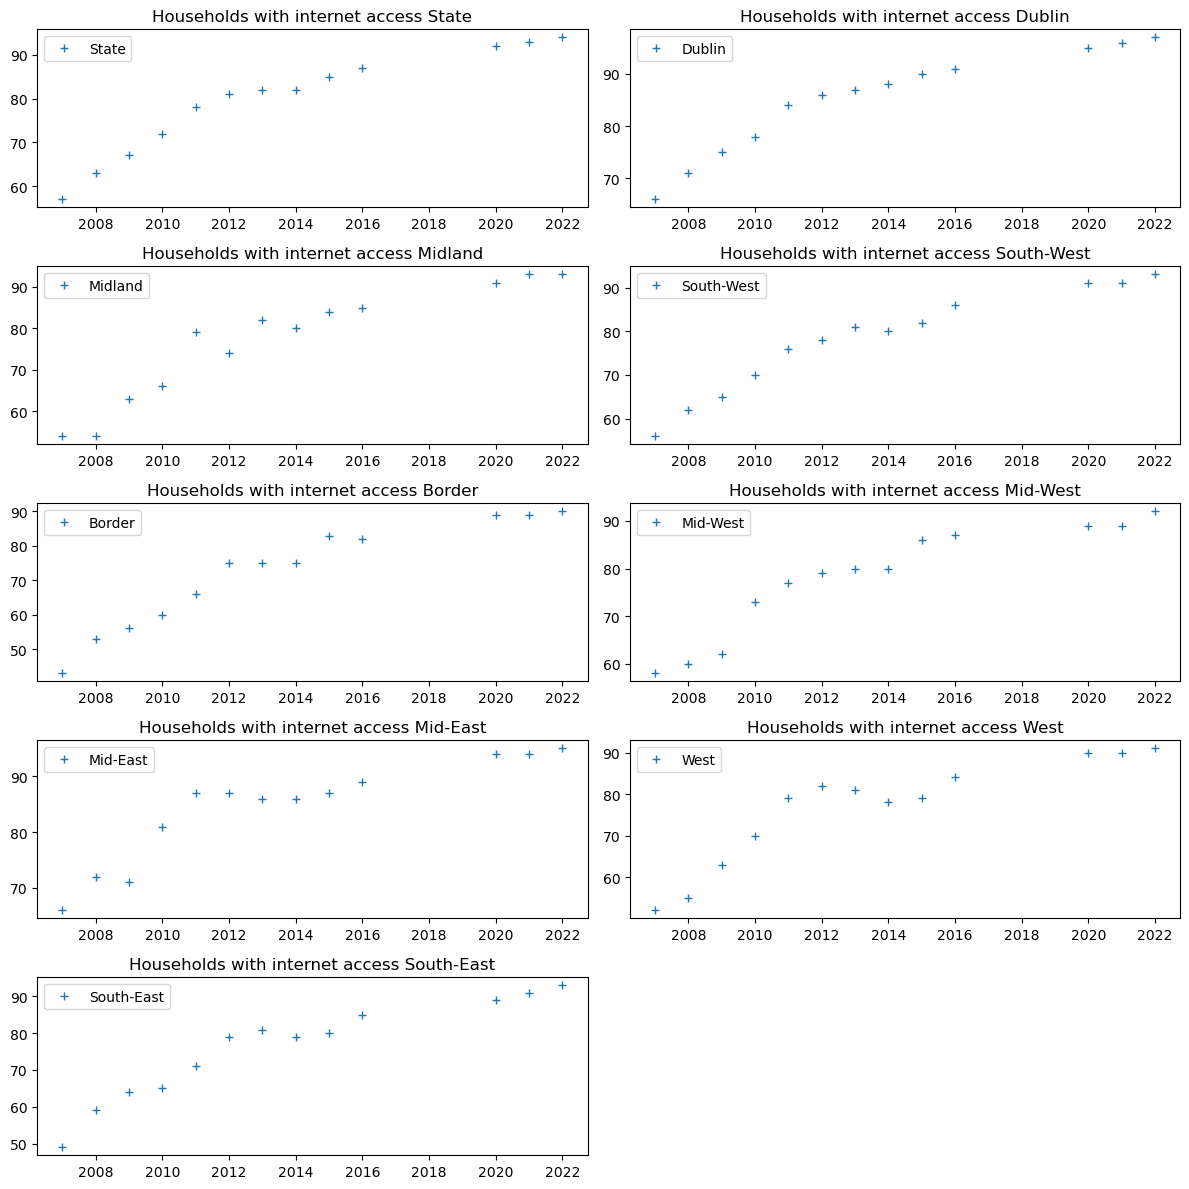

In [23]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(12, 12))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_ica['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_ica['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_ica[df_ica['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['VALUE'], '+', label=region)
    ax.legend()
    ax.set_title(f'Households with internet access {region}')
    ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

In [22]:
df_ica.to_csv("ICA_m.csv", index = False)

# interpolating NAs

In [25]:
df_ica = pd.read_csv("ICA_m.csv")

In [26]:
# Create a set to store the unique names of the regions
region_names = set()

# Iterate over the data frame and add each region name to the set
for region in df_ica['Region']:
    region_names.add(region)

# Convert the set to a list
unique_region_names = list(region_names)

In [27]:
years_to_interpolate = [2017, 2018, 2019]

# Create a list of lists, where each sublist contains the values for a single row in the new data frame
data = []
for year in years_to_interpolate:
    for region in unique_region_names:
        row = [np.nan, year, region, np.nan, np.nan]
        data.append(row)

In [28]:
df = pd.DataFrame(data, columns=['Statistic Label', 'Year', 'Region', 'UNIT', 'VALUE'])

In [29]:
df_ica = pd.concat([df_ica, df], ignore_index=True)

In [30]:
df_ica.head()

,Statistic Label,Year,Region,UNIT,VALUE
0,Households with Computer connected to the Inte...,2007,State,%,57.0
1,Households with Computer connected to the Inte...,2007,Dublin,%,66.0
2,Households with Computer connected to the Inte...,2007,Midland,%,54.0
3,Households with Computer connected to the Inte...,2007,South-West,%,56.0
4,Households with Computer connected to the Inte...,2007,Border,%,43.0


In [31]:
df_ica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  117 non-null    object 
 1   Year             144 non-null    int64  
 2   Region           144 non-null    object 
 3   UNIT             117 non-null    object 
 4   VALUE            117 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.8+ KB


In [32]:
df_ica['Statistic Label'] = df_ica['Statistic Label'].fillna('Households  with internet access')
df_ica['UNIT'] = df_ica['UNIT'].fillna('%')

In [33]:
df_ica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  144 non-null    object 
 1   Year             144 non-null    int64  
 2   Region           144 non-null    object 
 3   UNIT             144 non-null    object 
 4   VALUE            117 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.8+ KB


In [34]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_ica = df_ica.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_ica = df_ica.reset_index(drop=True)

In [35]:
# Group the DataFrame by region
grouped_dataframe = df_ica.groupby("Region")

# Interpolate the missing values in each region
interpolated_dataframe = grouped_dataframe.apply(lambda group: group.interpolate(method="linear", axis=0))

# Ungroup the DataFrame
interpolated_dataframe = interpolated_dataframe.reset_index(drop=True)


In [36]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_ica = interpolated_dataframe.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_ica = df_ica.reset_index(drop=True)

In [37]:
df_ica.head()

,Statistic Label,Year,Region,UNIT,VALUE
0,Households with Computer connected to the Inte...,2007,Border,%,43.0
1,Households with Computer connected to the Inte...,2007,Midland,%,54.0
2,Households with Computer connected to the Inte...,2007,South-East,%,49.0
3,Households with Computer connected to the Inte...,2007,Mid-West,%,58.0
4,Households with Computer connected to the Inte...,2007,South-West,%,56.0


In [38]:
# In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
df_ica = df_ica.replace('State', 'Ireland')

In [39]:
df_ica = df_ica.replace('Midland', 'Midlands')

In [40]:
df_ica.rename(columns={'VALUE': 'Households with Internet Access'}, inplace=True)

In [41]:
df = pd.DataFrame(df_ica, columns=['Year', 'Region', 'Households with Internet Access'])

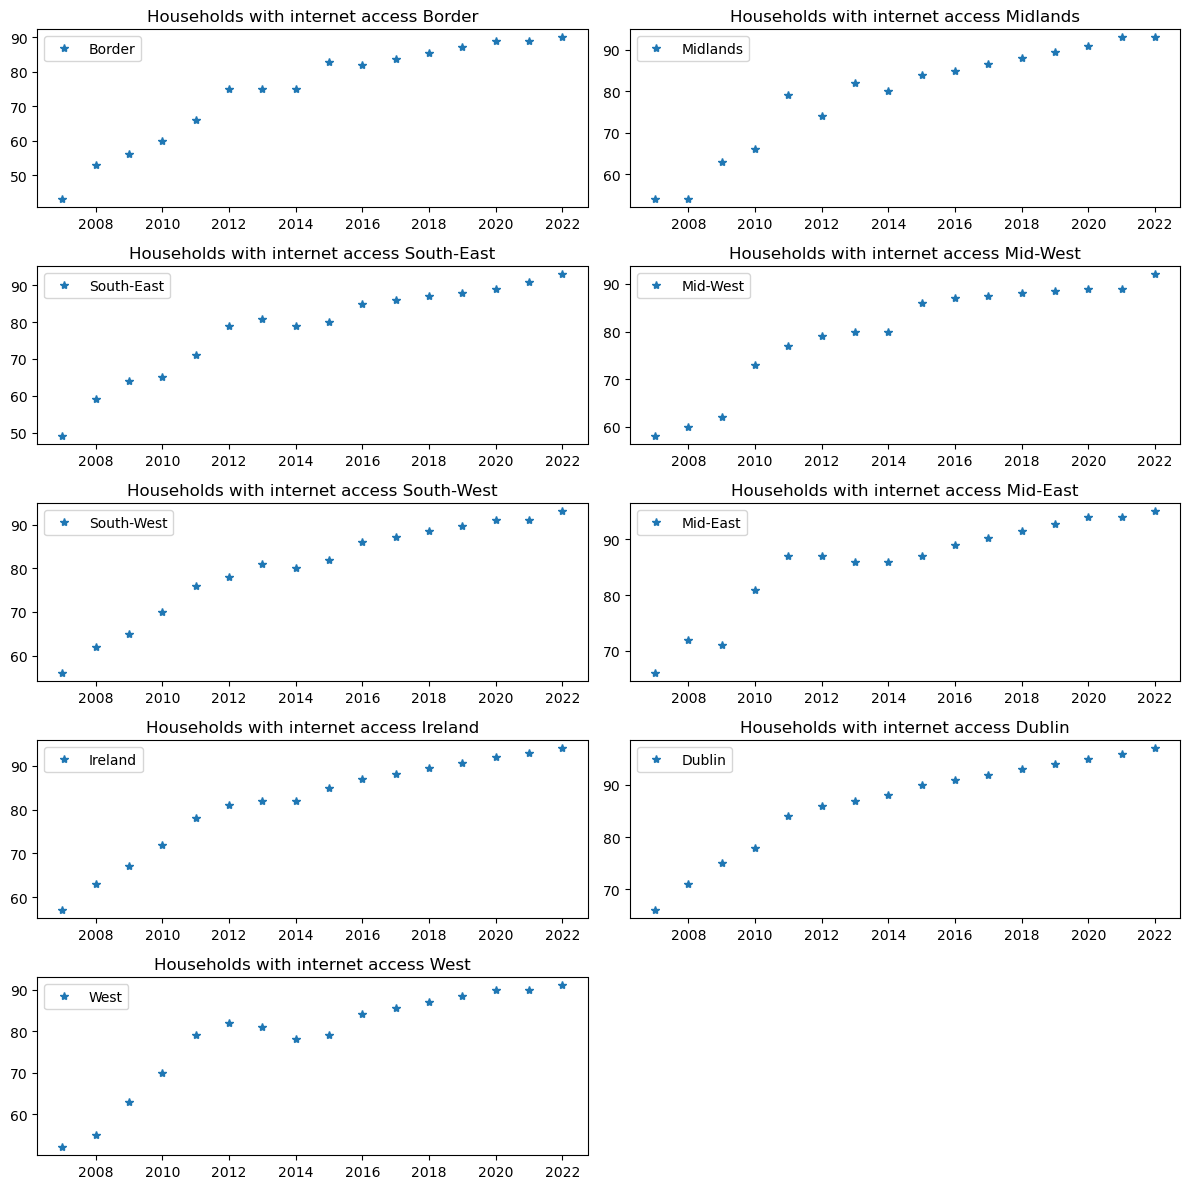

In [42]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(12, 12))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df[df['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['Households with Internet Access'], '*', label=region)
    ax.legend()
    ax.set_title(f'Households with internet access {region}')
    ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

In [43]:
df.to_csv("ICA_c.csv", index = False)